# ProsperLoan Data Exploration
## by Maxwell Ofoegbu

## Preliminary Wrangling

> This document explores a dataset containing prosperLoan and attributes for approximately 114000 enteries.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [29]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(113937, 81)
ListingKey                       object
ListingNumber                     int64
ListingCreationDate              object
CreditGrade                    category
Term                              int64
                                 ...   
PercentFunded                   float64
Recommendations                   int64
InvestmentFromFriendsCount        int64
InvestmentFromFriendsAmount     float64
Investors                         int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.09

In [6]:
# renaming some columns for consistensy
df=df.rename(columns = {'ListingCategory (numeric)':'ListingCategory', 'ProsperRating (numeric)':'ProsperRatingNumeric', 'ProsperRating (Alpha)':'ProsperRatingAlpha', 'TradesNeverDelinquent (percentage)':'TradesNeverDelinquentPercentage'})

In [7]:
# convert some colum features into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Current','Completed','Chargedoff','Defaulted',

'Past Due (1-15 days)',  'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',

'Past Due (91-120 days)', 'Past Due (>120 days)', 'FinalPaymentInProgress'],
                    'CreditGrade':['NC', 'HR', 'E',  'D', 'C',  'B',  'A',   'AA'],
                    'ProsperRatingAlpha': ['NC', 'HR', 'E',  'D', 'C',  'B',  'A',   'AA'],
                    'ProsperRatingNumeric': [1,2,3,4,5,6,7],
                    'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

### What is the structure of your dataset?

> There are 113937 prosperloan data entries with 80 features (ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, istingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, BorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months,TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months,RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit,TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months,DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome,LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed,ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount,LoanOriginationDate, LoanOriginationQuarter, MemberKey,MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, 
LP_GrossPrincipalLoss,LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments,
PercentFunded, Recommendations  ,InvestmentFromFriendsCount  , InvestmentFromFriendsAmount and ,Investors). Most variables are numeric in nature, but the variables LoanStatus, ProsperRatingAlpha, ProsperRatingNumeric, and IncomeRange are ordered factor variables with the following levels.

(worst) ——> (best)


LoanStatus: Current,Completed, Chargedoff, Defaulted, Past Due (1-15 days),  Past Due (16-30 days), Past Due (31-60 days), Past Due (61-90 days), Past Due (91-120 days), Past Due (>120 days), FinalPaymentInProgress
ProsperRatingAlpha: NC, HR, E,  D, C,  B,  A,   AA
ProsperRatingNumeric: 1,2,3,4,5,6,7
IncomeRange: Not displayed, Not employed, $0, $1-24,999, $25,000-49,999, $50,000-74,999, $75,000-99,999, $100,000+


### What is/are the main feature(s) of interest in your dataset?

> What features are best for predicting interest rate (BorrowerRate) of the Loan in the dataset?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 	I think the following factors should be influencing the BorrowerRate:
o   BorrowerState
o   ListingCategory
o   LoanStatus
o   Number of willing investors
o   MonthlyLoanPayment
o   LoanOriginalAmount
o   ProsperRatingNumeric
o	CreditGrade
o	BorrowerAPR
o	LenderYield
o   EmploymentStatus

## Univariate Exploration

> In this section, I will begin by investigating the distributions of each of the above individual variables. If
i see unusual points or outliers, i would take a deeper look to clean things up
and prepare myself to look at relationships between variables.

**univariate plot No1:**
 frequency distribution of BorrowerState

I'll begin my exploration by looking at the frequency distribution of the BorrowerState. This would give me an over-view of what each State looks like with respect to her borrowing lifestyle as well as present more guidelines for more investigation.

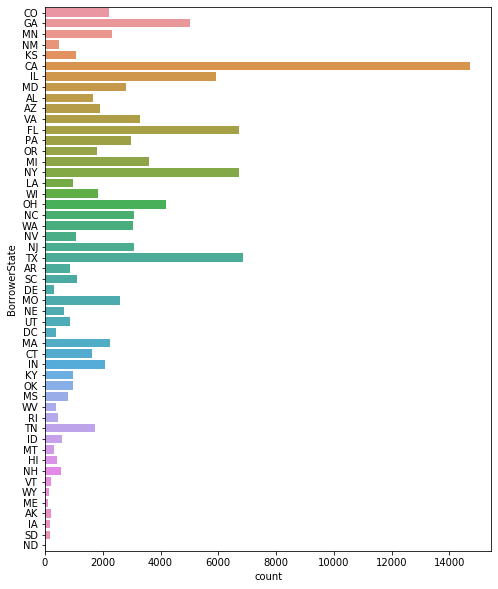

In [7]:
sb.countplot(data= df, y= 'BorrowerState');
fig = plt.gcf()
fig.set_size_inches(8, 10)

we don't have a good reason right now to associate each BorrowerState with a different color. It's better to start by plotting everything in one color to avoid being distracted

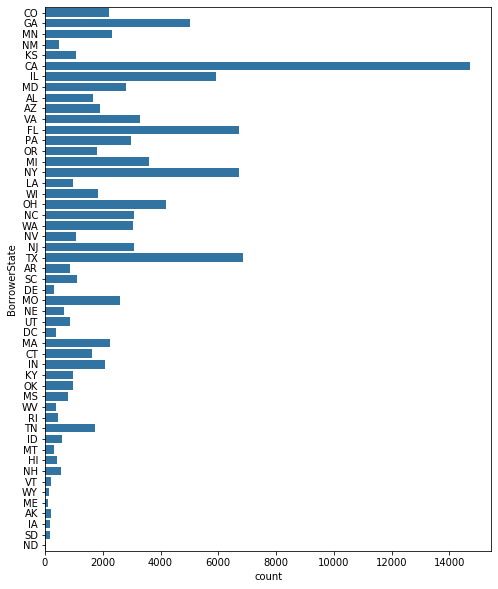

In [8]:
color_base = sb.color_palette()[0]
sb.countplot(data= df, y= 'BorrowerState',color=color_base);
fig = plt.gcf()
fig.set_size_inches(8, 10)

We can see from the plot that California is the most BorrowerState followed by three other States. Things are not clearly speltout and as a result I will have to sort the BorrowerState in order either by hard coding or programmatically.

A better approach is to write some code to obtain that order programmatically. The pandas series function value counts is valuable here. This function counts the frequency of each unique value in the series and then sort them in descending order. In order to get the bar order, we want the index values and then, store them in a variable. We pass this to the order parameter in order to get the sorted bar chart as shown beelow:


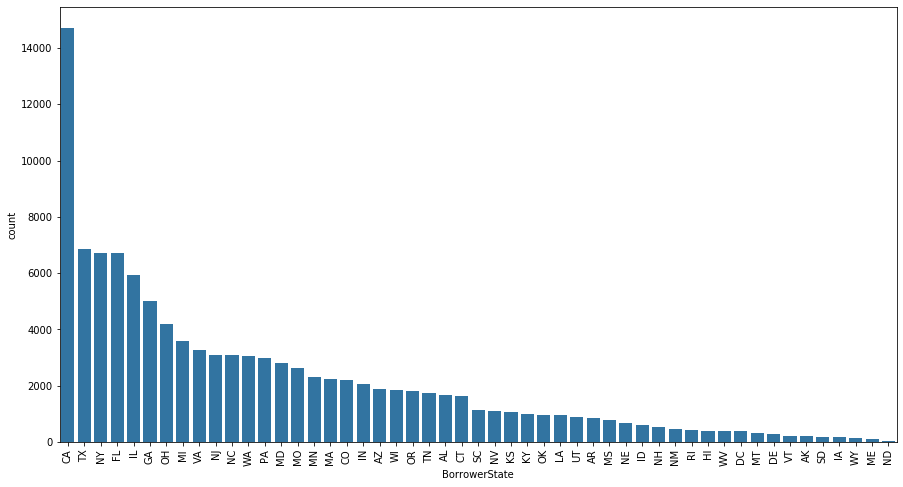

In [9]:
Borrower_State_order =df['BorrowerState'].value_counts().index
color_base = sb.color_palette()[0]
sb.countplot(data= df, x= 'BorrowerState',color=color_base, order =Borrower_State_order);
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.xticks(rotation=90);

The frequency distribution of BorrowerState shows that California is the most BorrowerState with Texas, New York, Florida as second most BorrowerState but just half way of California

**univariate plot No2: frequency distribution of ListingCategory**


Next, I'll be creating a bar chart on 'ListingCategory' a categorical features in the dataset. I would like to know how many loan categories there are in all as well as the frequency distribution of each category.

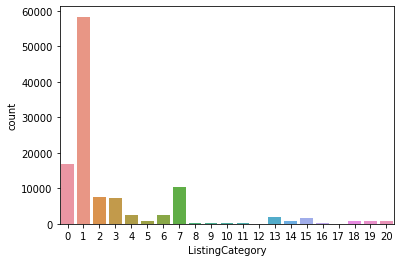

In [10]:
sb.countplot(data= df, x= 'ListingCategory');

Like in the previous case, it's better to start by plotting everything in one color to avoid being distracted

I will obtain my color value using Seaborn's color palette function. This function returns a list of tuples corresponding to the color palette set in the function's arguments. Since I haven't specified any parameters, I'll just get back the current default palette. Since I just want one color, I'm going to slice off index zero to get the first tuple in the list and I'm going to store that in the color_1 variable. am going to set the value of the color parameter to the tuple.

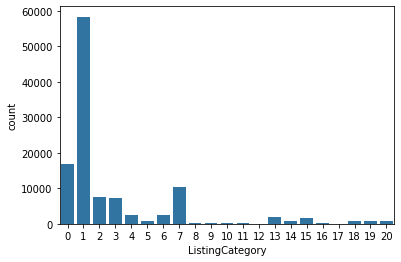

In [11]:
color_1 = sb.color_palette()[0]
sb.countplot(data= df, x= 'ListingCategory', color=color_1);

I presume that 'listing categories' is nominal categorical variables and so its inherent order is not as important as the order in which the values occur. I will be ordering the listingcategory like in the previous case to get the values in order of decreasing magnitude.

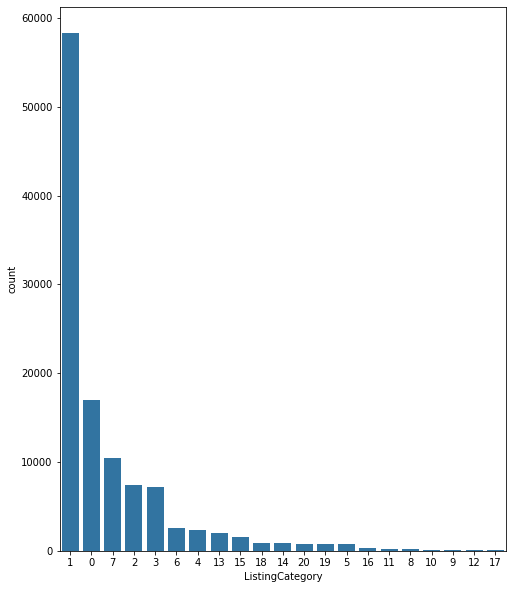

In [12]:
ListingCategory_order =df['ListingCategory'].value_counts().index
color_base = sb.color_palette()[0]
sb.countplot(data= df, x= 'ListingCategory',color=color_base, order =ListingCategory_order);
fig = plt.gcf()
fig.set_size_inches(8, 10)

If the listingcategory represent various loan category, the category number 1 is ranked highest followed by category zero. The LP_InterestandFees as well as CreditGrades associated with this category is worth further investigation in the bi-variate and multivariate exploration.

**univariate plot No3:** frequency distribution of LoanStatus

Here, I'll seek to know the frequency distribution of the statuses of the loan collected. like above, I’ll be using seaborn countplot to plot the bar chart of the LoanStatus column. 

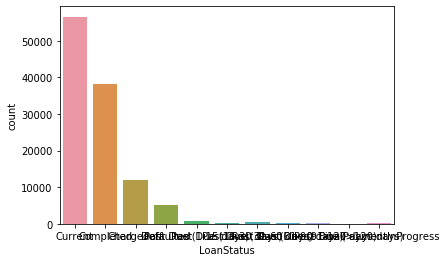

In [13]:
sb.countplot(data= df, x= 'LoanStatus'); 

The bar labels on the x-axis are mostly unreadable due to overlap. I’ll be using matplotlib's Xticks function to rotate the category labels. By setting rotation equals 90, the labels are turned 90 degrees counterclockwise and no longer overlap as shown below:

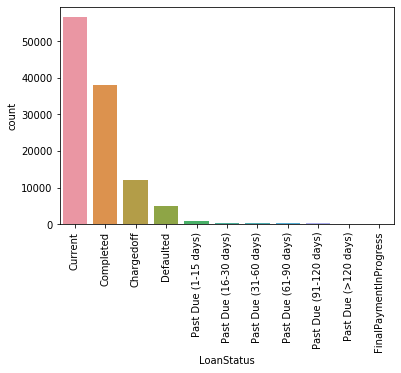

In [14]:
sb.countplot(data= df, x= 'LoanStatus')
plt.xticks(rotation=90);

An alternative strategy is to create a horizontal bar chart. In Seaborn, this is as simple as changing the x parameter into a Y as shown below:
The figure above reveals the bars colored with different colors which again is not appropriate considering the fact that the loanstatus is already encoded by labels on the x-axis and we don't have a good reason right now to associate each status with a different color. Therefore I’ll be plotting everything in one color to avoid being distracted.
We can see from the plot that the highest loanstatus are the current and completed features with the fewest not clearly seen and as a result we might want to sort the loan status in order either by hard coding or programmatically.
going by hard coding the values based on what can be seen in the unsorted plot I run the risk of not showing the correct order and therefore a better approach is to write some code to obtain that order programmatically. The pandas series function value counts is valuable here. This function counts the frequency of each unique value in the series and then sorts them in descending order of magnitude. In order to get the bar order, we want the index values and then, store them in a variable. We pass this to the order parameter in order to get the sorted bar chart as shown below:

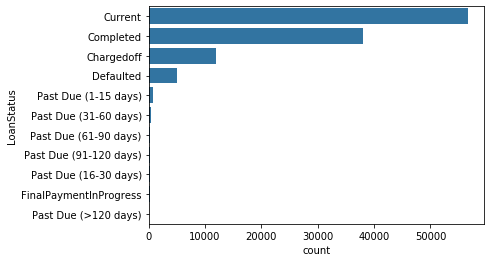

In [15]:
loanstatus_order =df['LoanStatus'].value_counts().index
color_base = sb.color_palette()[0]
sb.countplot(data= df, y= 'LoanStatus', color=color_base, order =loanstatus_order);

The levels of the loanstatus variable are listed on the Y-axis with frequency shown on the X-axis. Once we sort the plot by loanstatus frequency, we can see that current and completed loanstatus are the highest status.

The bar charts above were all encoded with the absolute frequency or number of data points. However, in order to know what proportion of the LoanStatus falls into each category we might instead be interested in the relative frequency. One way of doing this is to use Matplotlib to change the tick marks from leveling absolute counts, to relative counts.
To do this, I'll create a list of tick positions which I'll do by computing the length of the longest bar in terms of proportion. However, the LoanStatus column contains only categorical nominal variables and as a result has to be represented in a numerical form in order to compute the length of the longest bar for the numerator while the original df data frame gives us the denominator, we use value counts to get the numerator. To achieve this I’ll be using Pandas get_dummies function

In [16]:
LoanStatus =pd.get_dummies(df['LoanStatus']).groupby(level =0).sum()
max_loanstatus = LoanStatus['Current'].value_counts()[1]
max_loanstatus


56576

The values returned by get_dummies consist of zeros and ones, where a zero indicates the absence of that particular feature and a one indicates the presence of that feature. in our case we are only interested in the 1's for the length of the longest bar and we achieve this by the use of series indexing. The original df data frame gives us the denominator, and we use value counts to get the numerator.

In [17]:
df_original =df.shape[0]
df_original

113937

In [18]:
max_propotion = max_loanstatus/df_original
print(max_propotion)

0.4965551137909546


Since I would like to see the whole distribution it is therefore important to know what the value of the least proportion is in order to accommodate it, if possible, in our numpy arange function.

In [19]:
min_loanstatus = LoanStatus['Past Due (>120 days)'].value_counts()[1]
min_propotion = min_loanstatus/df_original
print(min_propotion)

0.00014042848240694418


Now, we'll use NumPy's arange function, to produce a set of evenly spaced proportioned values between zero and the max in steps of 0.1, and store the values in the tick props variable. I'll not be using the minimum proportion gotten above because it's too small. I'm also using a list comprehension to create an additional variable, 'tick_names' to apply to the tick labels. These strings will show the proportions with a consistent two decimal places.

In [20]:
tick_props = np.arange(0, max_propotion, 0.1)
tick_names =['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.10', '0.20', '0.30', '0.40']

Now I'm ready to modify my plot. To change the tick locations and labels, I'll use Matplotlib's X-tick's function. The first argument sets the tick positions. Since the counts are still an absolute value, we need to multiply tick props by the number of df to get their position correct.

The second argument sets the tick labels. We need to use both arguments here, since the positions and their values, are different. Finally, we use the X-label function to change the x-axis label from the default count, to a more appropriate proportion as shown below:

Text(0.5, 0, 'proportion')

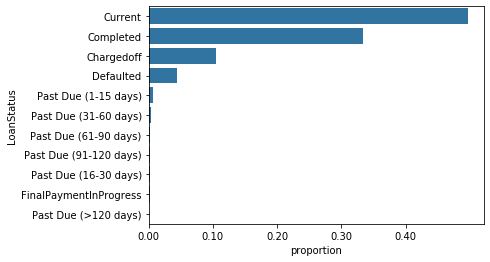

In [21]:
color_base = sb.color_palette()[0]
sb.countplot(data= df, y= 'LoanStatus', color=color_base, order =loanstatus_order);
plt.xticks(tick_props*df_original, tick_names)
plt.xlabel('proportion')

The resulting plot shows us that more than 40% of all loanstatus is current while about 35% of loanstatus is completed. There are also about 10% defaulted loanstatus. 

**univariate plot No4:** frequency distribution of Investors

Could it be possible that investors are influned by certain factors?

The basic histogram can be created in the same way as the bar chart. Data is set to df dataframe and X to the Investors variable.

Text(0, 0.5, 'count')

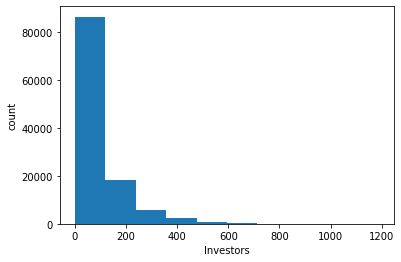

In [22]:
plt.hist(data =df, x='Investors');
plt.xlabel('Investors')
plt.ylabel('count') 

The distribution of Investors values appears right skewed, with relatively few points above 400 in value but there isn't a lot of detail beyond the 400 value.

By default, matplotlib will split the data into 10 bins, which is usually too few but in this case too small because we would need to zoom in. In addition, the bin boundaries are not particularly aligned with the tick marks making interpretation trickier. It might be worth doing a zoom in of the main bulk of the data through the use of axis limits.

We can use the matplotlib function xlim to set the upper and lower bounds of the bins that will be displayed in the plot. This function takes an argument, a list, or tuple of two values specifying these limits. Here, I'll make use of Numpy's arange function to create bins of size fifty. The first argument is the minimum value, while the second argument, will be the maximum value. The third argument gives the step-size for the bins.

I will add plus fifty to the second argument. This is because the values generated by arange will not include the maximum value. By adding plus fifty, this means that all values should be represented in the chart. When I add the bins list to the Hist Function, this creates a view of the data that implies the data is right skewed, save for the presence of possible outliers beyond the 400 value range.

Text(0, 0.5, 'count')

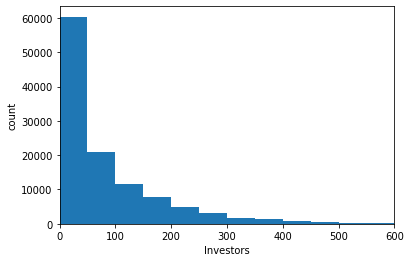

In [23]:
bins =  np.arange(0, df['Investors'].max()+50, 50)
plt.hist(data =df, x='Investors', bins=bins)
plt.xlim((0,600));
plt.xlabel('Investors')
plt.ylabel('count')

As can be seen from the plot above, a smaller portion of investors has the largest frequency. 

Seaborn also has a function for creating histograms, Distplot. Unlike the countplot and Hist function seen before, the main argument taken by the function is just the pandas series containing all the data. You'll notice two things about this plot. First of all, the default bin count is larger than in matplotlib. Secondly, you'll notice that a line has been plotted over the bars and that the Y axis values are very small. This is because the line is a density curve estimate of the data distribution, and the total area underneath the curve is set to be =1. The density curve estimate can be turned off by setting the parameter kde=false. With this parameter, you can see that the histogram is plotted alone with counts on the Y axis.

Text(0, 0.5, 'count')

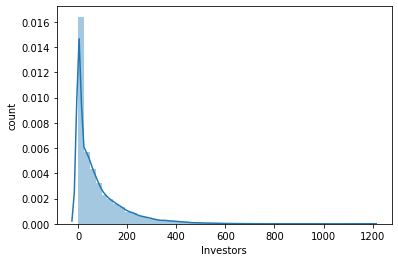

In [24]:
sb.distplot(df['Investors']);
plt.ylabel('count')

Text(0, 0.5, 'count')

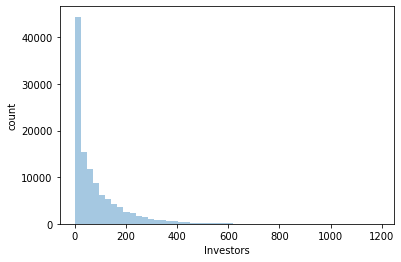

In [25]:
sb.distplot(df['Investors'], kde=False);

plt.ylabel('count')

**univariate plot No5:** frequency distribution of MonthlyLoanPayment

What is the distribution of the MonthlyLoanPayment?

Text(0, 0.5, 'count')

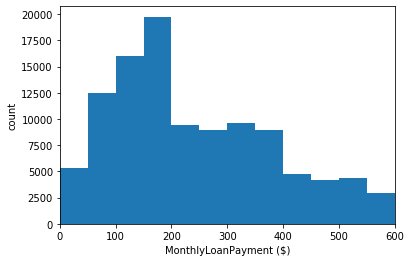

In [26]:
bins =  np.arange(0, df['MonthlyLoanPayment'].max()+50, 50)
plt.hist(data =df, x='MonthlyLoanPayment', bins=bins)
plt.xlim((0,600));
plt.xlabel('MonthlyLoanPayment ($)')
plt.ylabel('count')


The MonthlyLoanPayment appear partly right skwed with a lot of MonthlyLoanPayment in the lower end. The smaller the MonthlyLoanPayment the more payment is made.

**univariate plot No6:** frequency distribution of LoanOriginalAmount
What is the LoanOriginalAmount 

**univariate plot No7:** frequency distribution of BorrowerAPR.**

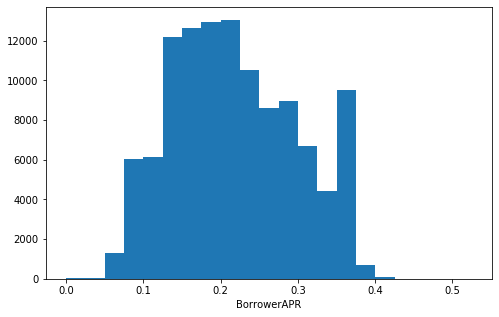

In [28]:
binsize = .025
bins = np.arange(0, df['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR')
plt.show() 

**univariate plot No7:** frequency distribution of BorrowerRate.**

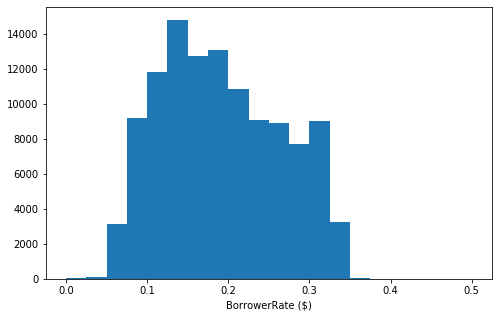

In [29]:
binsize = .025
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate ($)')
plt.show() 

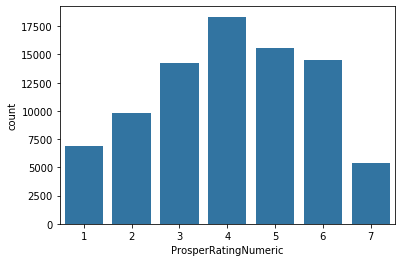

In [30]:
 color_base = sb.color_palette()[0]
sb.countplot(data= df, x= 'ProsperRatingNumeric', color=color_base);

**univariate plot No7:** frequency distribution of CreditGrade.**

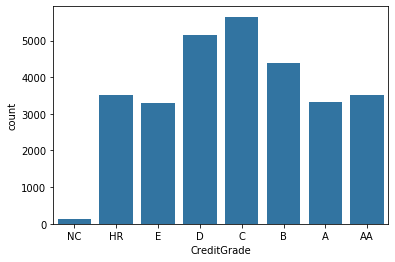

In [31]:
color_base = sb.color_palette()[0]
sb.countplot(data= df, x= 'CreditGrade', color=color_base);

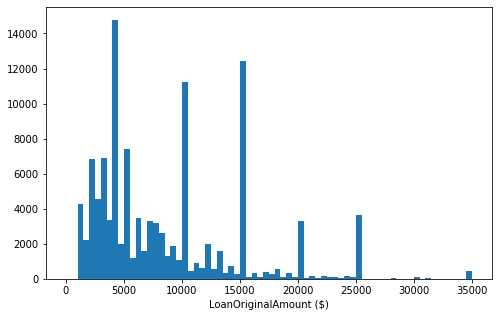

In [96]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.show() 

The initial plot of the LoanOriginalAmount shows some immediate points of attention. On the LoanOriginalAmount you would notice sudden spikes and some other very high figures in the far right. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

removing outlies

In [97]:
dfselect = df[['ListingNumber','LenderYield', 'BorrowerRate', 'BorrowerAPR', 'LoanOriginalAmount', 'EstimatedLoss']]
dfselectdescribe = dfselect.describe([.25,.75,.9,.95,.99])

In [99]:
dfselectdescribe

,ListingNumber,LenderYield,BorrowerRate,BorrowerAPR,LoanOriginalAmount,EstimatedLoss
count,1.139370e+05,113937.000000,113937.000000,113912.000000,113937.00000,84853.000000
mean,6.278857e+05,0.182701,0.192764,0.218828,8337.01385,0.080306
std,3.280762e+05,0.074516,0.074818,0.080364,6245.80058,0.046764
min,4.000000e+00,-0.010000,0.000000,0.006530,1000.00000,0.004900
25%,4.009190e+05,0.124200,0.134000,0.156290,4000.00000,0.042400
50%,6.005540e+05,0.173000,0.184000,0.209760,6500.00000,0.072400
75%,8.926340e+05,0.240000,0.250000,0.283810,12000.00000,0.112000
90%,1.090058e+06,0.299900,0.309900,0.345770,15000.00000,0.147500
95%,1.156791e+06,0.307700,0.317700,0.357970,20000.00000,0.165000
99%,1.221572e+06,0.340000,0.350000,0.374530,25000.00000,0.183000


In [100]:
percentile = dfselectdescribe.loc['99%']
percentile

ListingNumber         1.221572e+06
LenderYield           3.400000e-01
BorrowerRate          3.500000e-01
BorrowerAPR           3.745300e-01
LoanOriginalAmount    2.500000e+04
EstimatedLoss         1.830000e-01
Name: 99%, dtype: float64

In [101]:
dfselectLim = dfselect[dfselect<=percentile]
dfselectLim.max()

ListingNumber         1.221566e+06
LenderYield           3.400000e-01
BorrowerRate          3.500000e-01
BorrowerAPR           3.745300e-01
LoanOriginalAmount    2.500000e+04
EstimatedLoss         1.830000e-01
dtype: float64

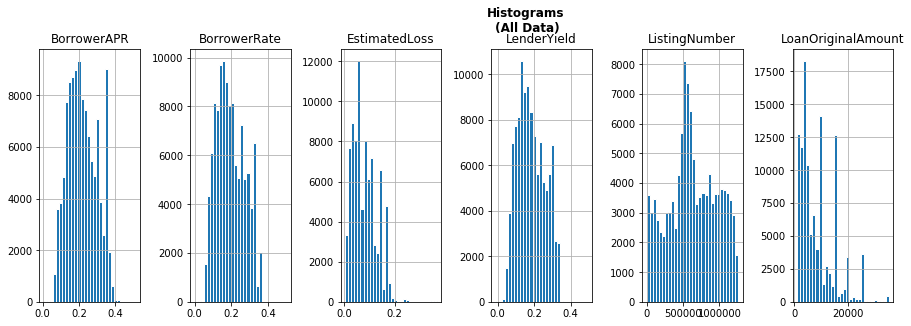

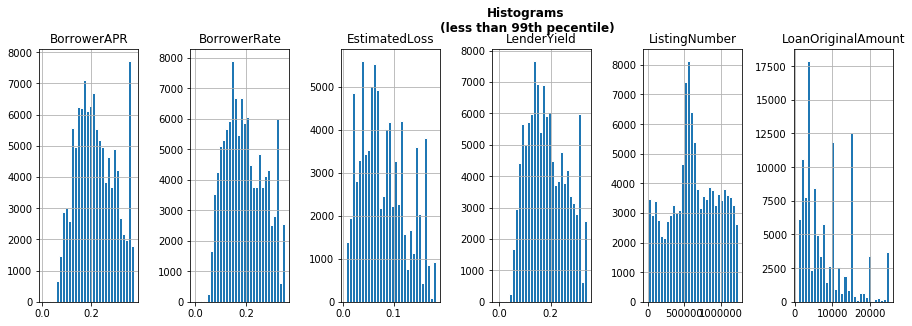

In [102]:
dfselect.hist(bins =30, edgecolor ="white",layout =(1,7), figsize =[14.70, 4.27]);
plt.suptitle("Histograms\n (All Data)", y=1.05, weight ="bold")
plt.tight_layout()
plt.show()


dfselectLim.hist(bins =30, edgecolor ="white",layout =(1,7), figsize =[14.70, 4.27]);
plt.suptitle("Histograms\n (less than 99th pecentile)", y=1.05, weight ="bold")
plt.tight_layout()
plt.show()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> LoanOriginalAmount has a long-tailed distribution, with a lot of LoanOriginalAmount on the low end below the $10000 point, and few on the high end. When plotted on a log-scale, the LoanOriginalAmount distribution looks roughly bimodal, with one peak between $2000 and $5000, and a second peak a little below $10000. Interestingly, there's a steep jump in frequency right before the $10000, rather than a smooth ramp up!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were needs to rename certain columns as well as convert a few categorical columns into ordered categorical type!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

C:\Users\Max\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

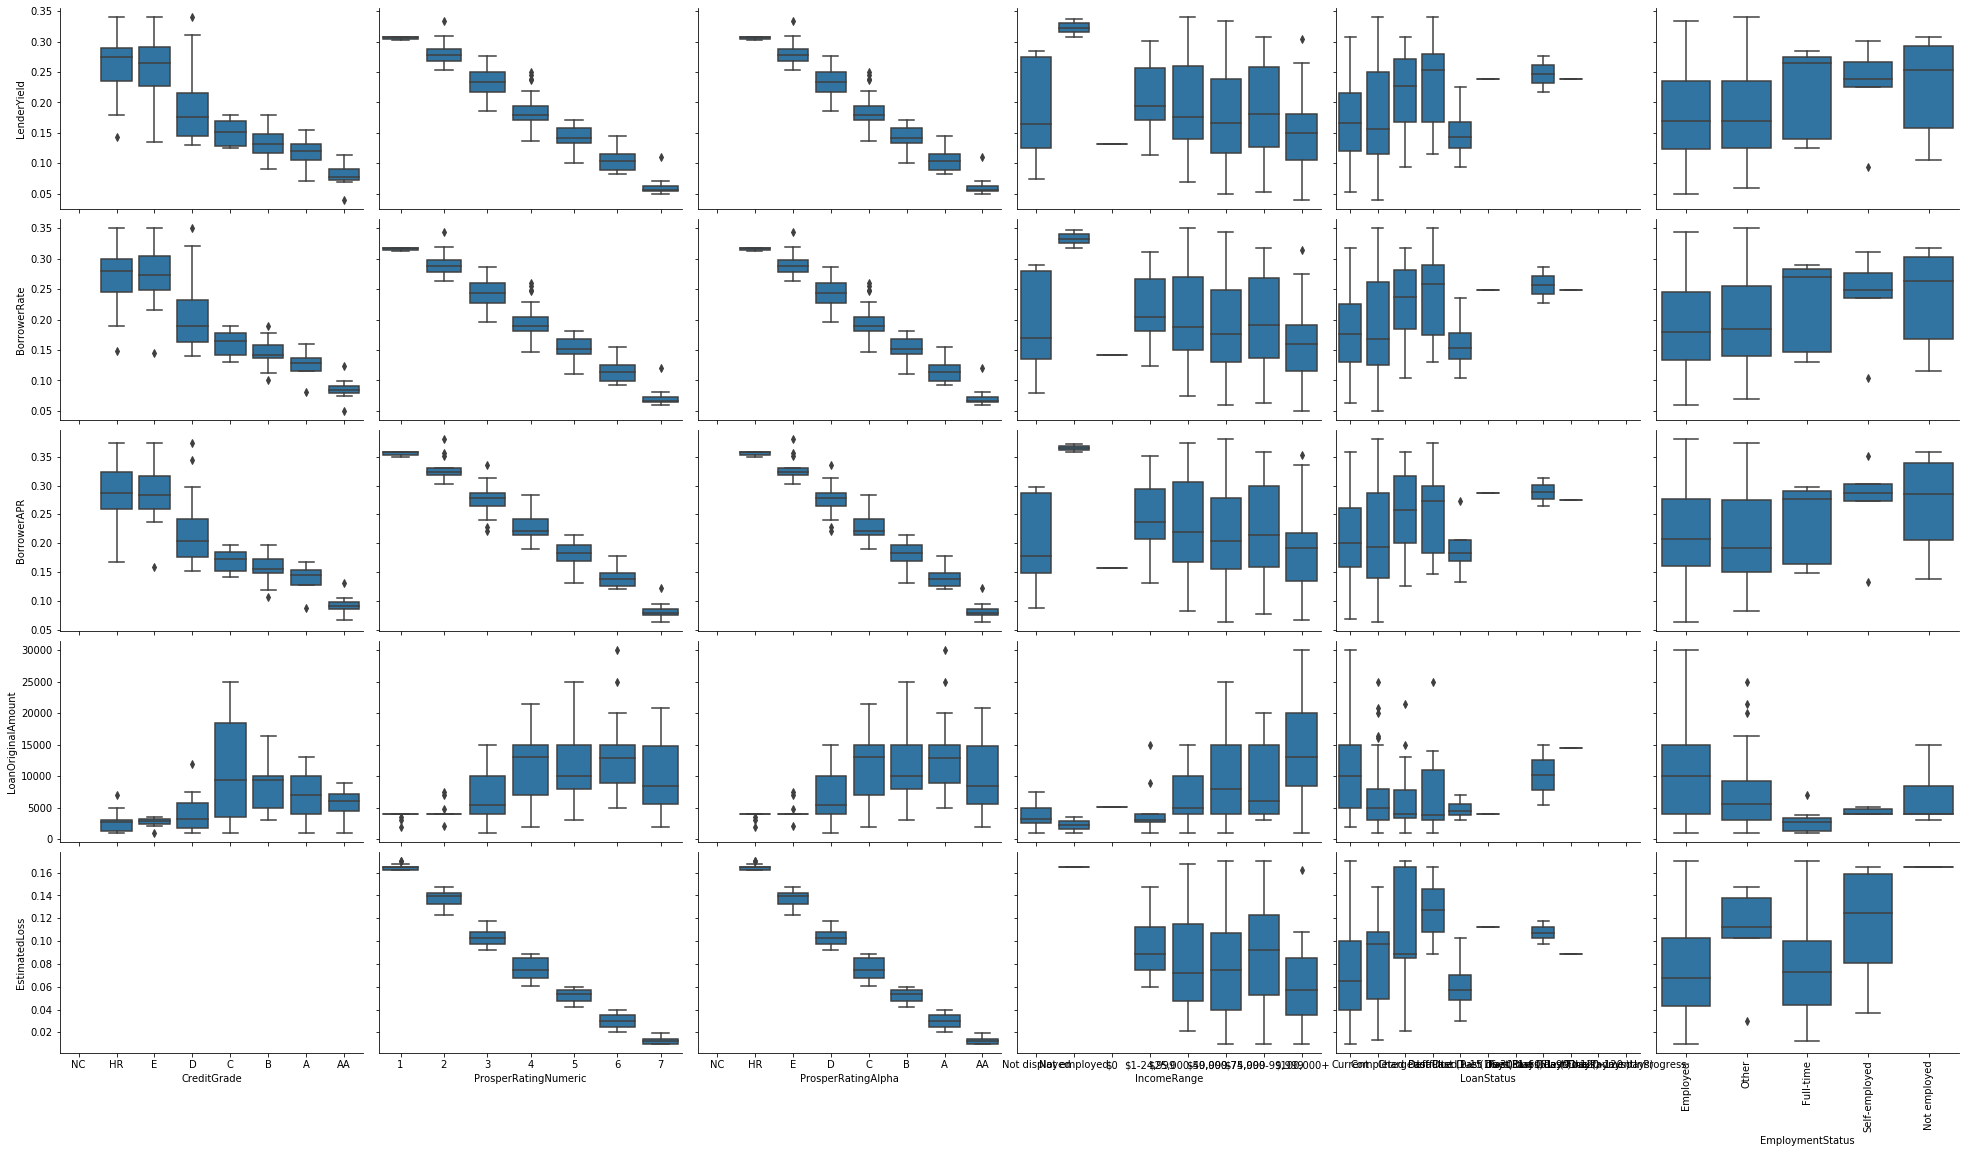

In [103]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
categoric_vars_new = ['CreditGrade', 'ProsperRatingNumeric','ProsperRatingAlpha','IncomeRange','LoanStatus', 'EmploymentStatus']
numeric_vars_new = ['LenderYield', 'BorrowerRate', 'BorrowerAPR', 'LoanOriginalAmount', 'EstimatedLoss']


samples = np.random.choice(df.shape[0], 200, replace = False)
df_samp = df.loc[samples,:]

def boxgrid_1(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = numeric_vars_new, x_vars =  categoric_vars_new,
                size = 3, aspect = 1.5)
g.map(boxgrid_1)
plt.xticks(rotation=90);
plt.show();

from the boxplot above it becomes even more clare that both prosperRatingNumeric and prosperRatingAlpha have similiar correlation with borrowerRate, s a resul i will use just one in the next boxplot. it also seem to me that loanstatus is not a good measure for estimating borrowerRate, so i will also drop that. EmploymentStatus doesn't seem to have a strong correlation with borrowerrate, so i'll drop that as well

C:\Users\Max\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

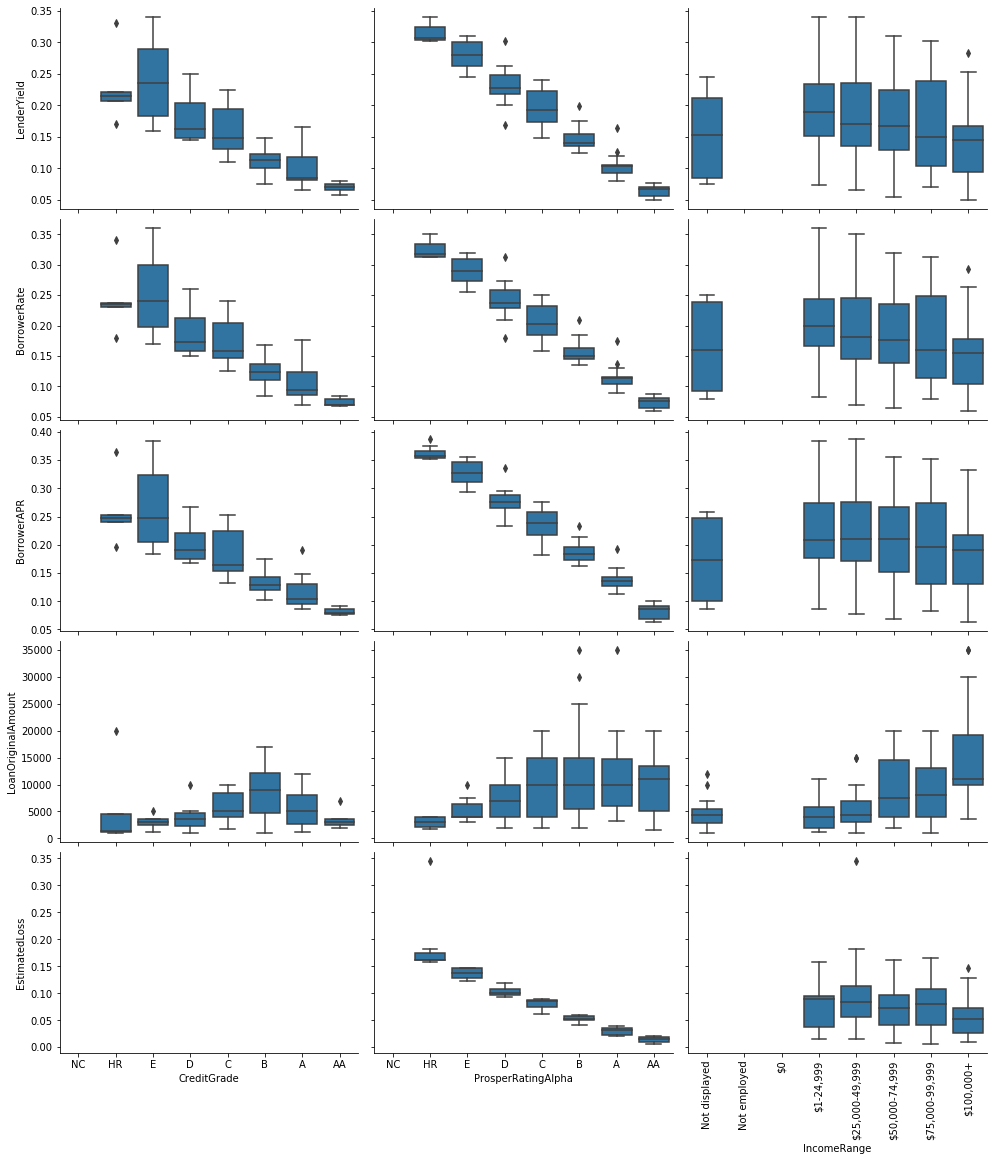

In [104]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
categoric_vars_new = ['CreditGrade', 'ProsperRatingAlpha','IncomeRange']
numeric_vars_new = ['LenderYield', 'BorrowerRate', 'BorrowerAPR', 'LoanOriginalAmount', 'EstimatedLoss']


samples = np.random.choice(df.shape[0], 200, replace = False)
df_samp = df.loc[samples,:]

def boxgrid_1(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = numeric_vars_new, x_vars =  categoric_vars_new,
                size = 3, aspect = 1.5)
g.map(boxgrid_1)
plt.xticks(rotation=90);
plt.show();

Text(0, 0.5, 'BorrowerRate')

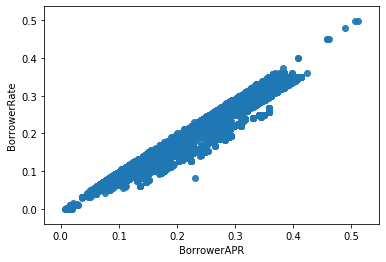

In [32]:
scatter_plot =plt.scatter(data = df, x='BorrowerAPR', y='BorrowerRate', alpha =0.9);
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')

Text(0, 0.5, 'BorrowerRate')

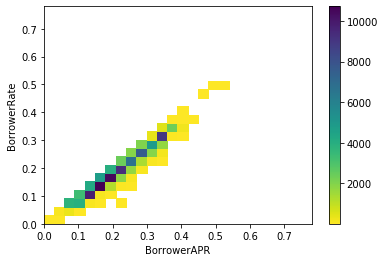

In [33]:
bin_x =np.arange(0, .50+.3, .03) 
bin_y =np.arange(0, .50+.3, .03)

plt.hist2d(data = df, x='BorrowerAPR', y='BorrowerRate', cmin =0.5, cmap = 'viridis_r', bins =[bin_x, bin_y]);
plt.colorbar()
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')

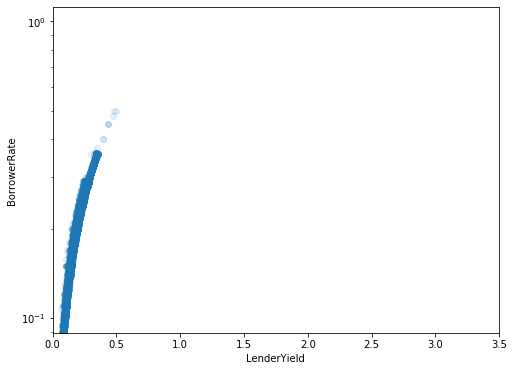

In [34]:
# scatter plot of LenderYield vs. BorrowerRate, with log transform on price axis

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'LenderYield', y = 'BorrowerRate', alpha = 1/10)
plt.xlim([0, 3.5])
plt.xlabel('LenderYield')
plt.yscale('log')

plt.ylabel('BorrowerRate')
plt.show()

There is an obvious linear relationship between the BorrowerRate and the LenderYield, however, the points are too crowded that we cannot observe what exactly is going on

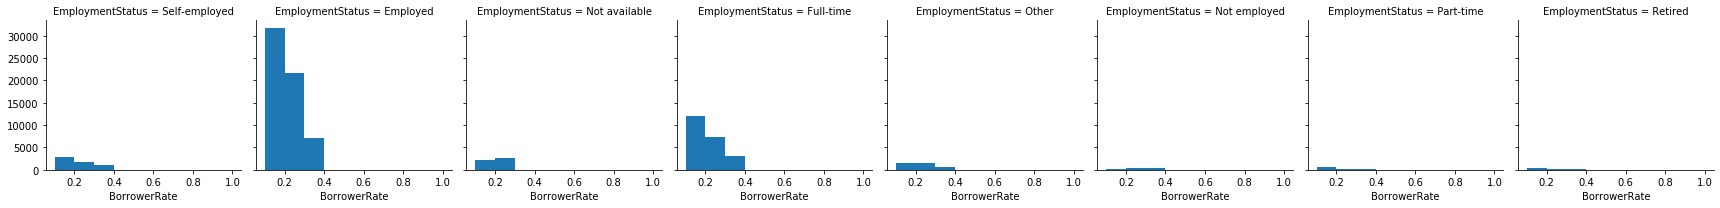

In [35]:
bins = np.arange(.1, 1+.1, .1)
g =sb.FacetGrid(data = df, col ='EmploymentStatus')
g.map(plt.hist, 'BorrowerRate', bins =bins)

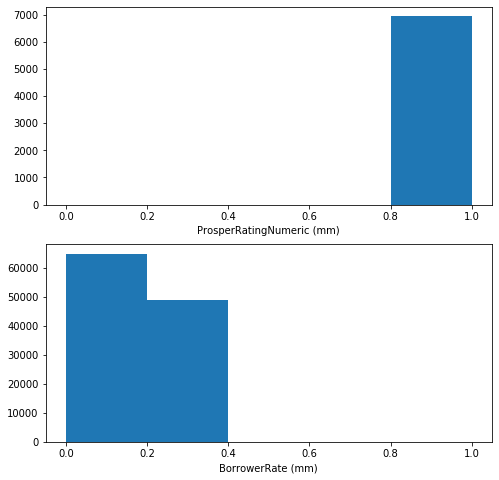

In [8]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

variables = ['ProsperRatingNumeric', 'BorrowerRate']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(0, 1+0.2, 0.2)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()


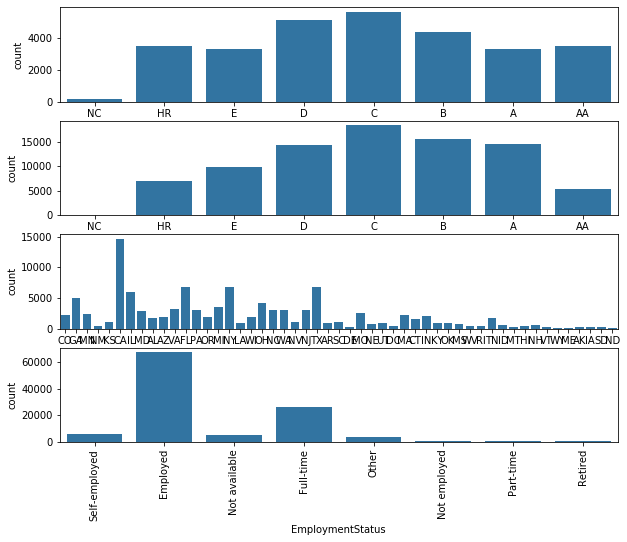

In [9]:
# let's plot all four together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=4, figsize = [10,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'CreditGrade', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'ProsperRatingAlpha', color = default_color, ax = ax[1])
sb.countplot(data = df, x = 'BorrowerState', color = default_color, ax = ax[2])
plt.xticks(rotation=90);
sb.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[3])


plt.xticks(rotation=90);
plt.show()

In [10]:
numeric_vars = ['LenderYield', 'ProsperRatingNumeric','Investors', 'BorrowerRate', 'LoanOriginalAmount','Term', 'BorrowerAPR', 'Term', 'EstimatedLoss','ProsperRatingNumeric','ProsperScore','ProsperRatingAlpha','ListingCategory','CreditScoreRangeLower', 'CreditScoreRangeUpper','CurrentDelinquencies','AmountDelinquent','RevolvingCreditBalance','IncomeRange','StatedMonthlyIncome','InvestmentFromFriendsAmount']


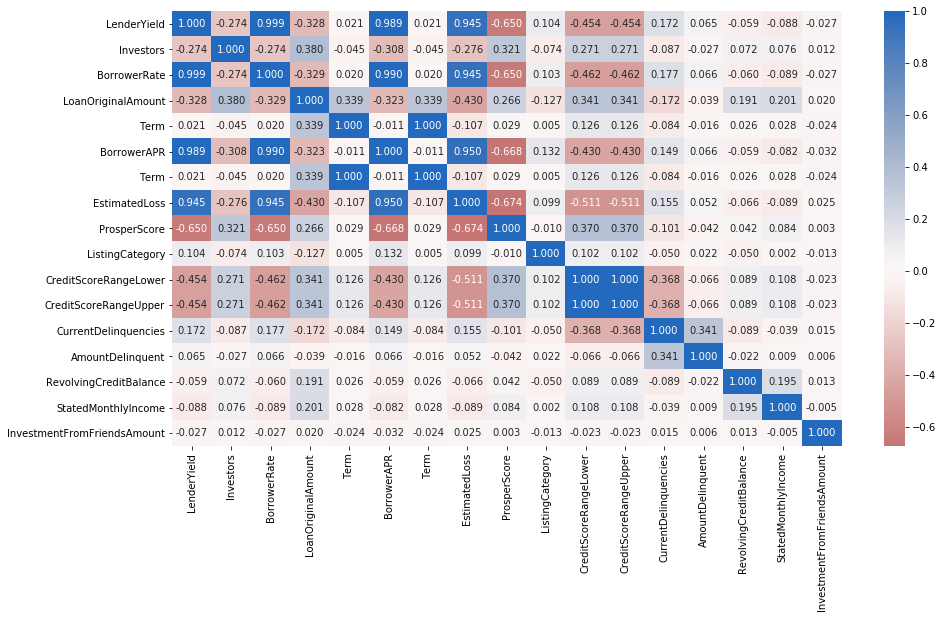

In [11]:
# correlation plot
plt.figure(figsize = [15, 8])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

With respect to our feature of interest, namely, predicting interest rate ( BorrowerRate), we have from the correlation heat map a very strong positive correlation with LenderYield, BorrowerAPR and  EstimatedLoss, while we have a moderate negative correlation with ProsperScore, CreditScoreRangeLower and CreditScoreRangeUpper.

The other features examined showed very week correlation with BorrowerRate and as a result I don’t think they are of any more importance in our analyses so I will drop them and concentrate on the features that have shown at least a moderate correlation with BorrowerRate.  

In [15]:
numeric_vars_new = ['LenderYield','ProsperRatingNumeric','BorrowerAPR','BorrowerRate', 'EstimatedLoss','ProsperScore', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']
categoric_vars = ['CreditGrade', 'ProsperRatingAlpha', 'EmploymentStatus']

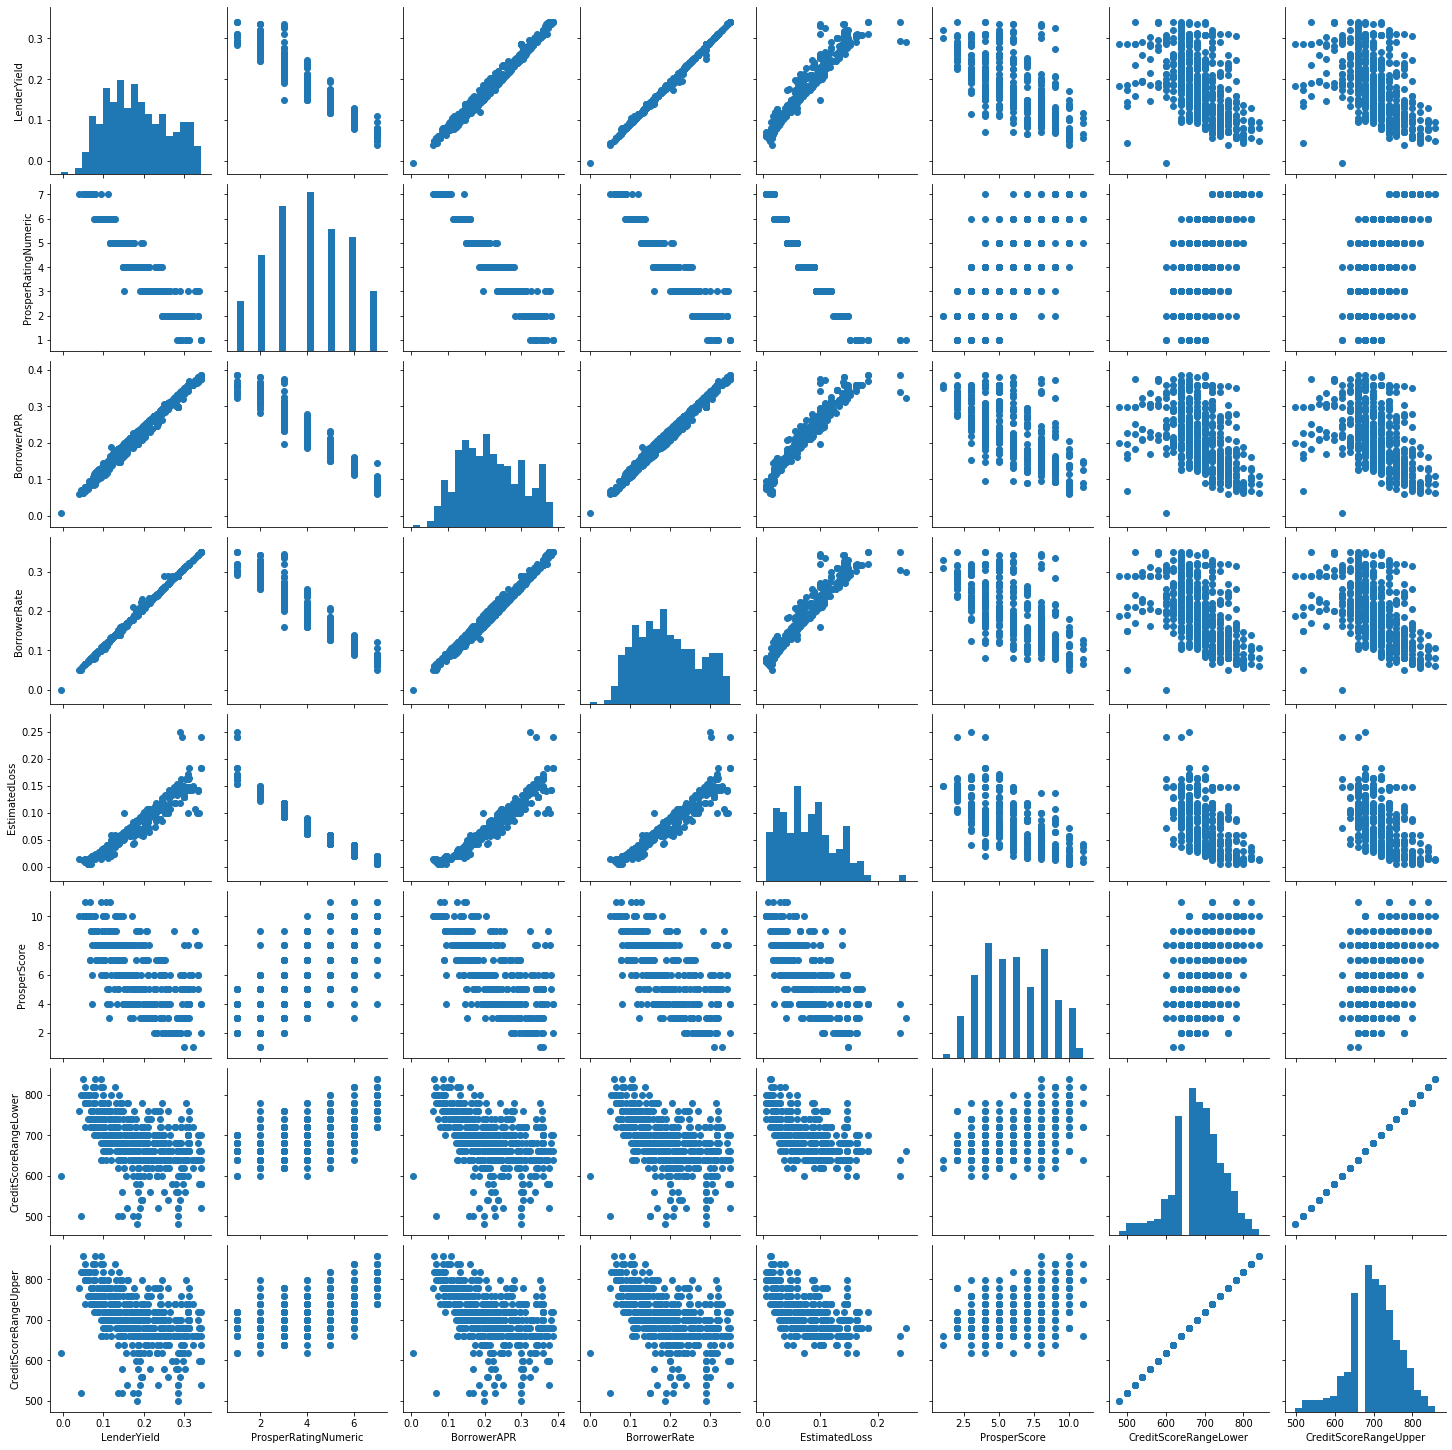

In [13]:
# plot matrix: sample 200 numeric features so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars_new)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

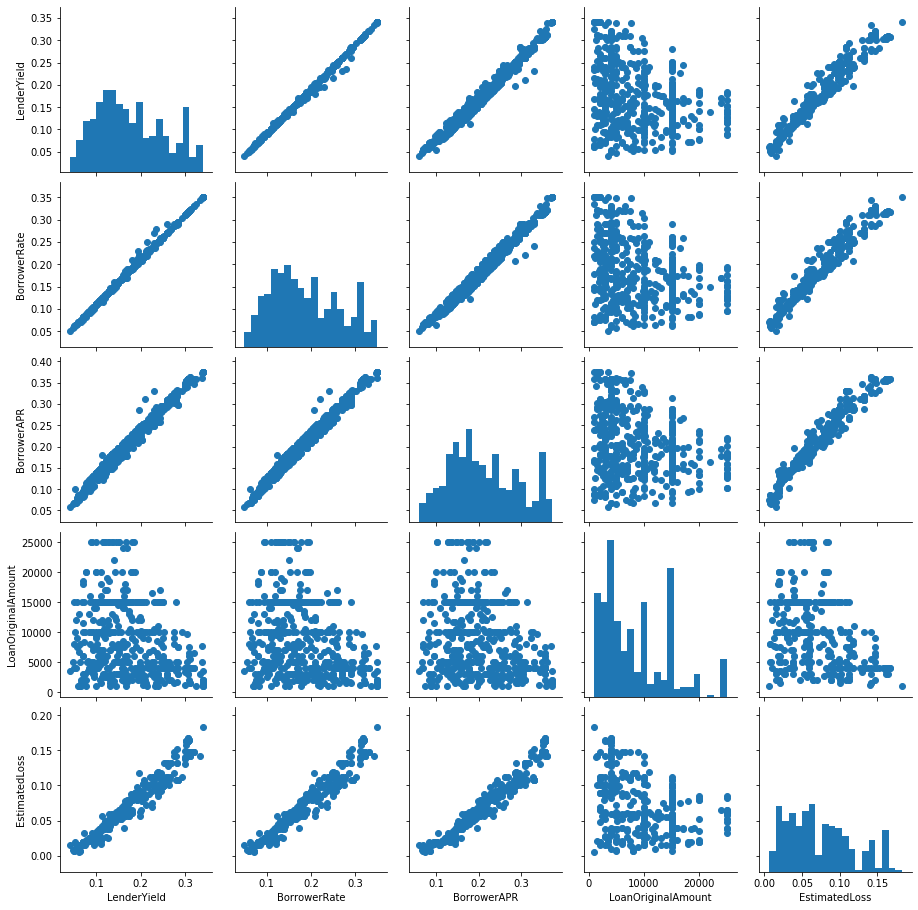

In [22]:

# plot matrix: sample 200 numeric features so that plots are clearer and
# they render faster
numeric_vars_new_new =['LenderYield', 'BorrowerRate', 'BorrowerAPR', 'LoanOriginalAmount', 'EstimatedLoss']
samples = np.random.choice(dfselectLim.shape[0], 500, replace = False)
df_samp = dfselectLim.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars_new_new)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As can be seen from the above plot, LenderYield BorrowerAPR and EstimatedLoss show strong correlation with BorrowerRate, there i shall limit my investigation to just those three component in the multivariate plot

Finally, let's look at relationships between the three categorical features

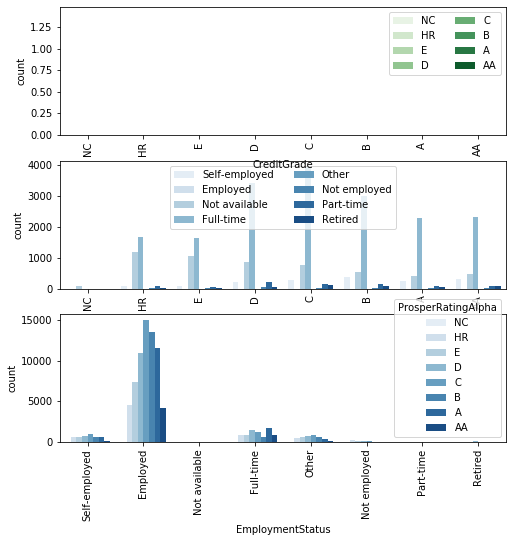

In [17]:
plt.figure(figsize = [8, 8])

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'CreditGrade', hue = 'EmploymentStatus', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=90);
# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'CreditGrade', hue = 'ProsperRatingAlpha', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation=90);
# subplot 1: color vs cut
plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'ProsperRatingAlpha', palette = 'Blues')
plt.xticks(rotation=90);
plt.show()

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how BorrowerRate and LenderYield are related to one another for all of the data.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As can be seen from the above plot, LenderYield BorrowerAPR and EstimatedLoss show strong correlation with BorrowerRate, there i shall limit my investigation to just those three component in the multivariate plot!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>it is observed also that CreditGrade observe a negative correlation with with borrowerRate!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\Max\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


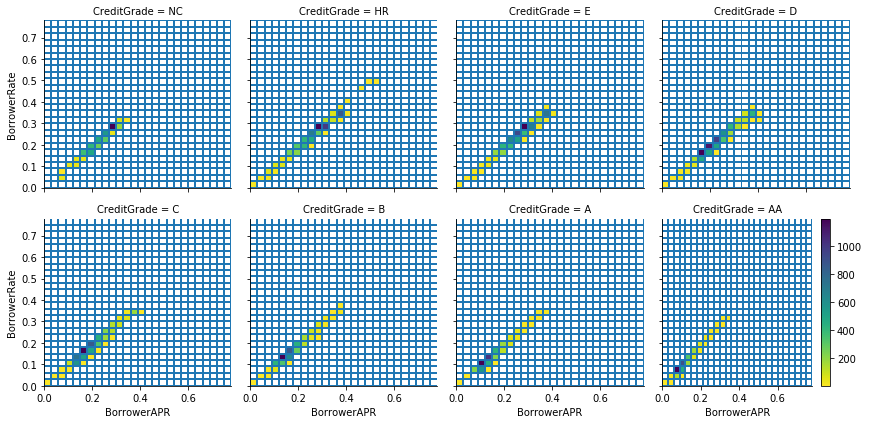

In [87]:
# create faceted heat maps on levels of the 'CreditGrade' variable
bin_x =np.arange(0, .50+.3, .03) 
bin_y =np.arange(0, .50+.3, .03)
g = sb.FacetGrid(data = df, col = 'CreditGrade', col_wrap = 4, size = 3)                 
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate', bins =[bin_x,bin_y], cmin=0.5, cmap='viridis_r')
plt.colorbar()
g.set_xlabels('BorrowerAPR')
g.set_ylabels('BorrowerRate')
plt.show()

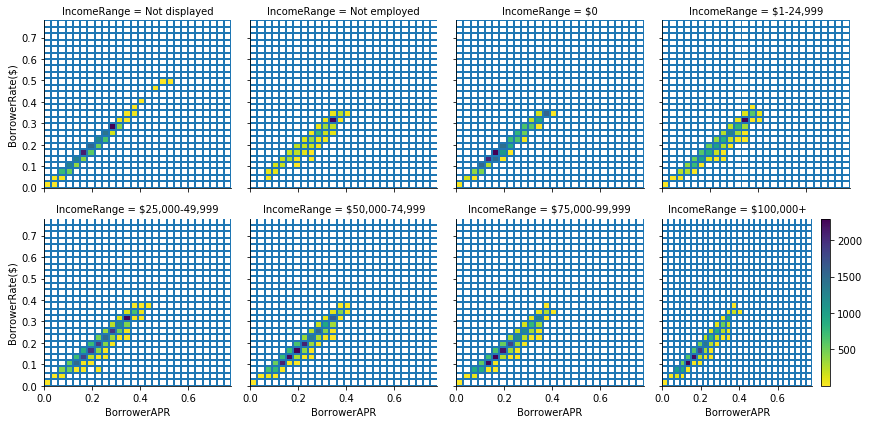

In [88]:
# create faceted heat maps on levels of the clarity variable
bin_x =np.arange(0, .50+.3, .03) 
bin_y =np.arange(0, .50+.3, .03)
g = sb.FacetGrid(data = df, col = 'IncomeRange', col_wrap = 4, size = 3)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate', bins =[bin_x,bin_y], cmin=0.5, cmap='viridis_r')
plt.colorbar()
g.set_xlabels('BorrowerAPR')
g.set_ylabels('BorrowerRate($)')

plt.show()

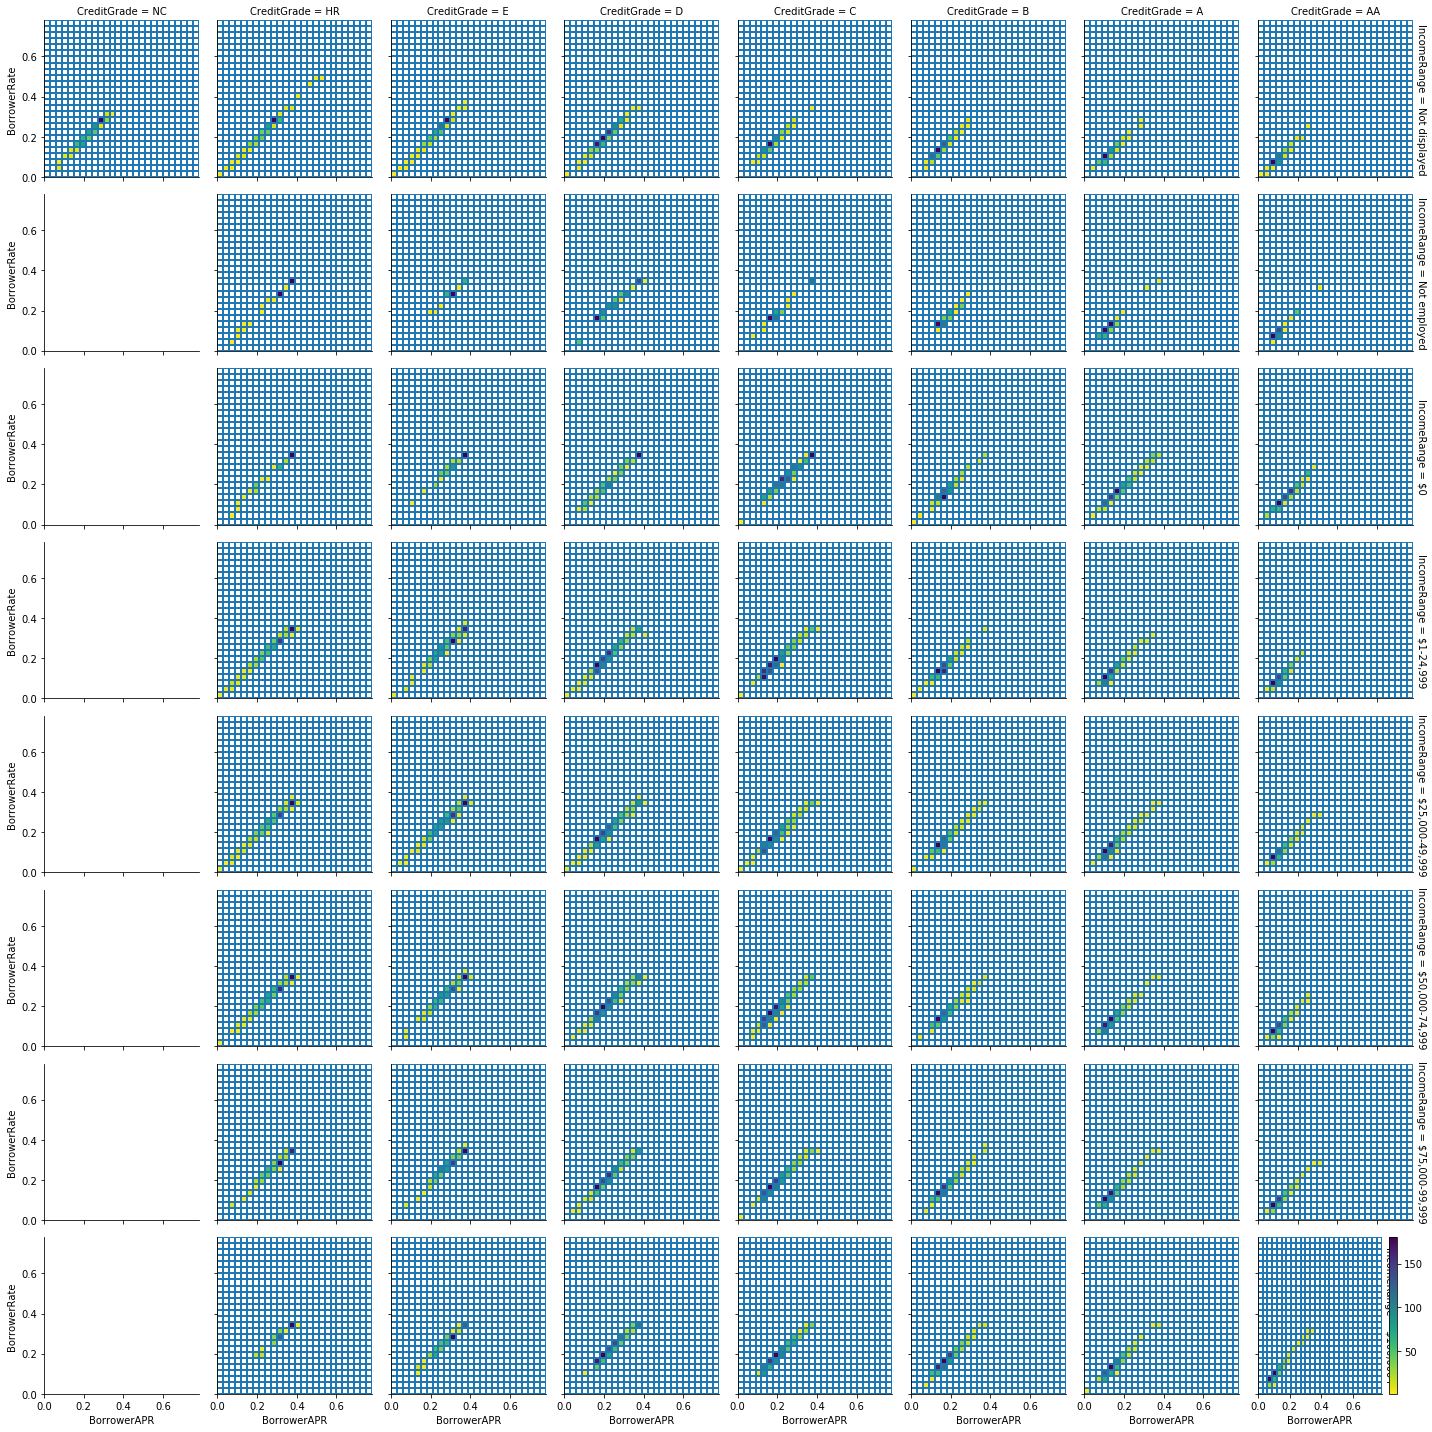

In [90]:
# create faceted heat maps on levels of CreditGrade and EmploymentStatus
bin_x =np.arange(0, .50+.3, .03) 
bin_y =np.arange(0, .50+.3, .03)
g = sb.FacetGrid(data = df, col = 'CreditGrade', row = 'IncomeRange', size = 2.5,
                 margin_titles = True)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate', bins =[bin_x,bin_y], cmin=0.5, cmap='viridis_r')
plt.colorbar()
g.set_xlabels('BorrowerAPR')
g.set_ylabels('BorrowerRate')

plt.show()



In [91]:
# select BorrowerRate of approximately .3 
df_flag = (df['BorrowerRate'] >= 0.1) & (df['BorrowerRate'] <= .4)
df_1c = df.loc[df_flag,:]

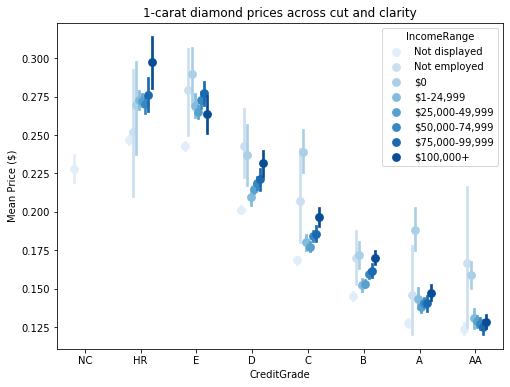

In [92]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_1c, x = 'CreditGrade', y = 'BorrowerRate', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('1-carat diamond prices across cut and clarity')
plt.ylabel('Mean Price ($)')

plt.show();

In [93]:
# select BorrowerRate of approximately 0.1

df_flag = (df['BorrowerRate'] >= 0.1) & (df['BorrowerRate'] <= .13)
df_1c = df.loc[df_flag,:]

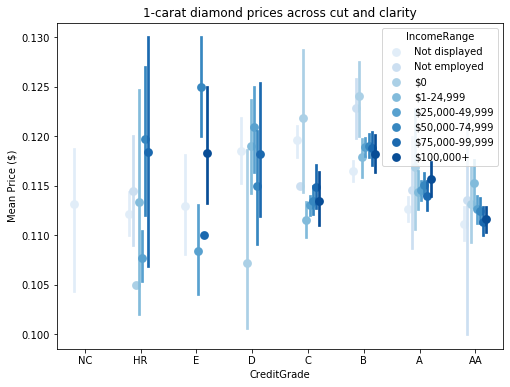

In [94]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_1c, x = 'CreditGrade', y = 'BorrowerRate', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('1-carat diamond prices across cut and clarity')
plt.ylabel('Mean Price ($)')

plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!